## PNEUOMIA DETECTION IN LUNGS USING CNN

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import cv2
from keras.preprocessing.image import img_to_array
     

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)


In [3]:
train_images = r"C:\Users\pnuka\Desktop\LUNGS DEMO\chest_xray\train"


In [4]:
train_generator = train_datagen.flow_from_directory(train_images,
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary')
     


Found 5216 images belonging to 2 classes.


In [5]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory(r"C:\Users\pnuka\Desktop\LUNGS DEMO\chest_xray\train",
    target_size= (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 5216 images belonging to 2 classes.


## pneumonia

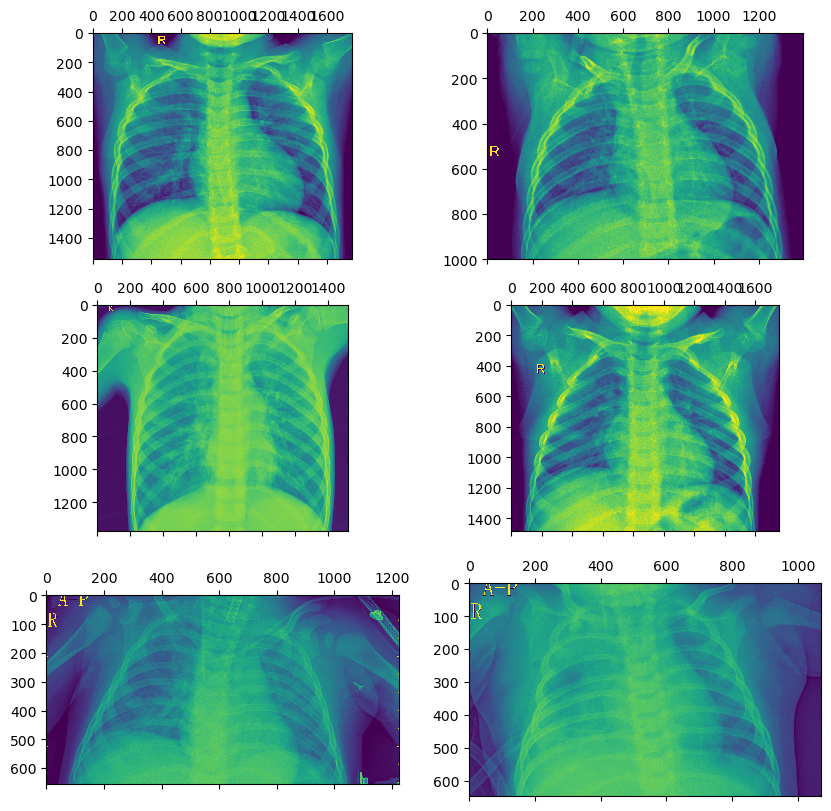

In [7]:
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[41]))
plot2.matshow(plt.imread(train_generator.filepaths[176]))
plot3.matshow(plt.imread(train_generator.filepaths[1553]))
plot4.matshow(plt.imread(train_generator.filepaths[354]))
plot5.matshow(plt.imread(train_generator.filepaths[2679]))
plot6.matshow(plt.imread(train_generator.filepaths[2710]))

## normal

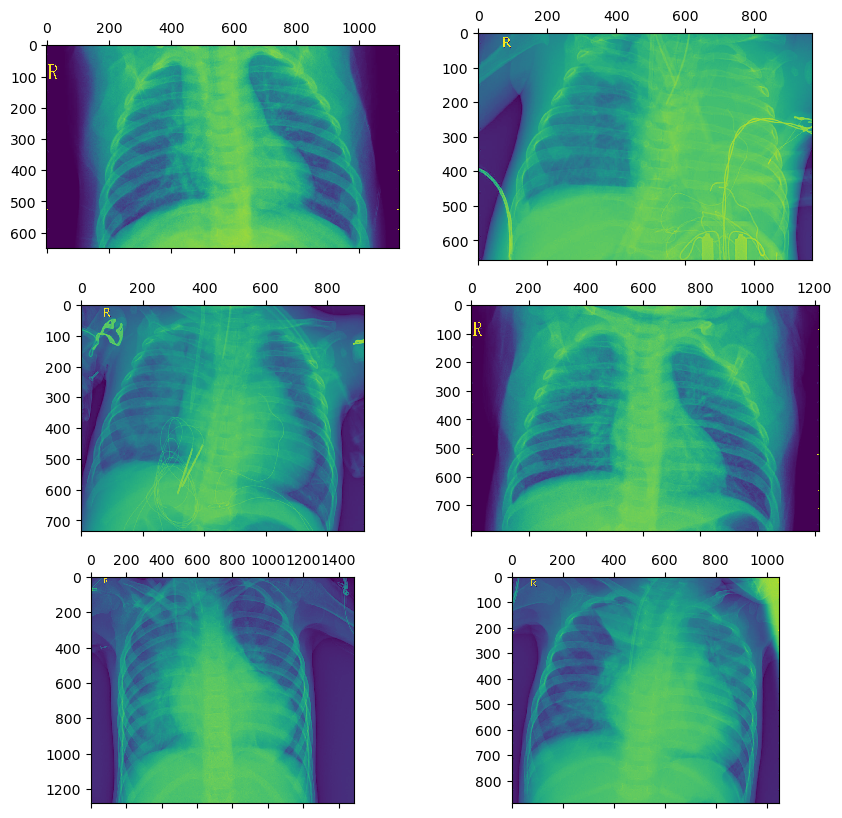

In [8]:
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[1419]))
plot2.matshow(plt.imread(train_generator.filepaths[1365]))
plot3.matshow(plt.imread(train_generator.filepaths[1400]))
plot4.matshow(plt.imread(train_generator.filepaths[1350]))
plot5.matshow(plt.imread(train_generator.filepaths[1345]))
plot6.matshow(plt.imread(train_generator.filepaths[1349]))

## Neural networks using tensor flow

In [9]:
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape= (300, 300, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256, activation= 'relu'),
                                   tf.keras.layers.Dense(512, activation= 'relu'),
                                   tf.keras.layers.Dense(1, activation= 'sigmoid')
])
model.summary()
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
     

C:\Users\pnuka\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,983,009 (7.56 MB)

 Trainable params: 1,983,009 (7.56 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [10]:
history = model.fit(train_generator, epochs = 50, validation_data = validation_generator)
     

C:\Users\pnuka\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 558s 13s/step - accuracy: 0.7485 - loss: 0.6541 - val_accuracy: 0.7429 - val_loss: 0.5881
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 556s 14s/step - accuracy: 0.8130 - loss: 0.4185 - val_accuracy: 0.9043 - val_loss: 0.2334
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 531s 13s/step - accuracy: 0.8860 - loss: 0.2667 - val_accuracy: 0.9304 - val_loss: 0.1736
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 525s 13s/step - accuracy: 0.9132 - loss: 0.2174 - val_accuracy: 0.9482 - val_loss: 0.1387
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 543s 13s/step - accuracy: 0.9144 - loss: 0.1976 - val_accuracy: 0.9216 - val_loss: 0.1963
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 512s 13s/step - accuracy: 0.9247 - loss: 0.1898 - val_accuracy: 0.9546 - val_loss: 0.1164
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 531s 13s/step - accuracy: 0.9264 - loss: 0.1806 - val_accuracy: 0.9438 - val_loss: 0.1498
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 524s 13s/step - accuracy: 0.9324 - loss: 0.1665 - val_accuracy: 0.

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
     

## LOSS V/S NUMBER OF EPOCHS

Loss Vs Num. of Epochs
Training Loss : 0.0519 
Value loss : 0.0701


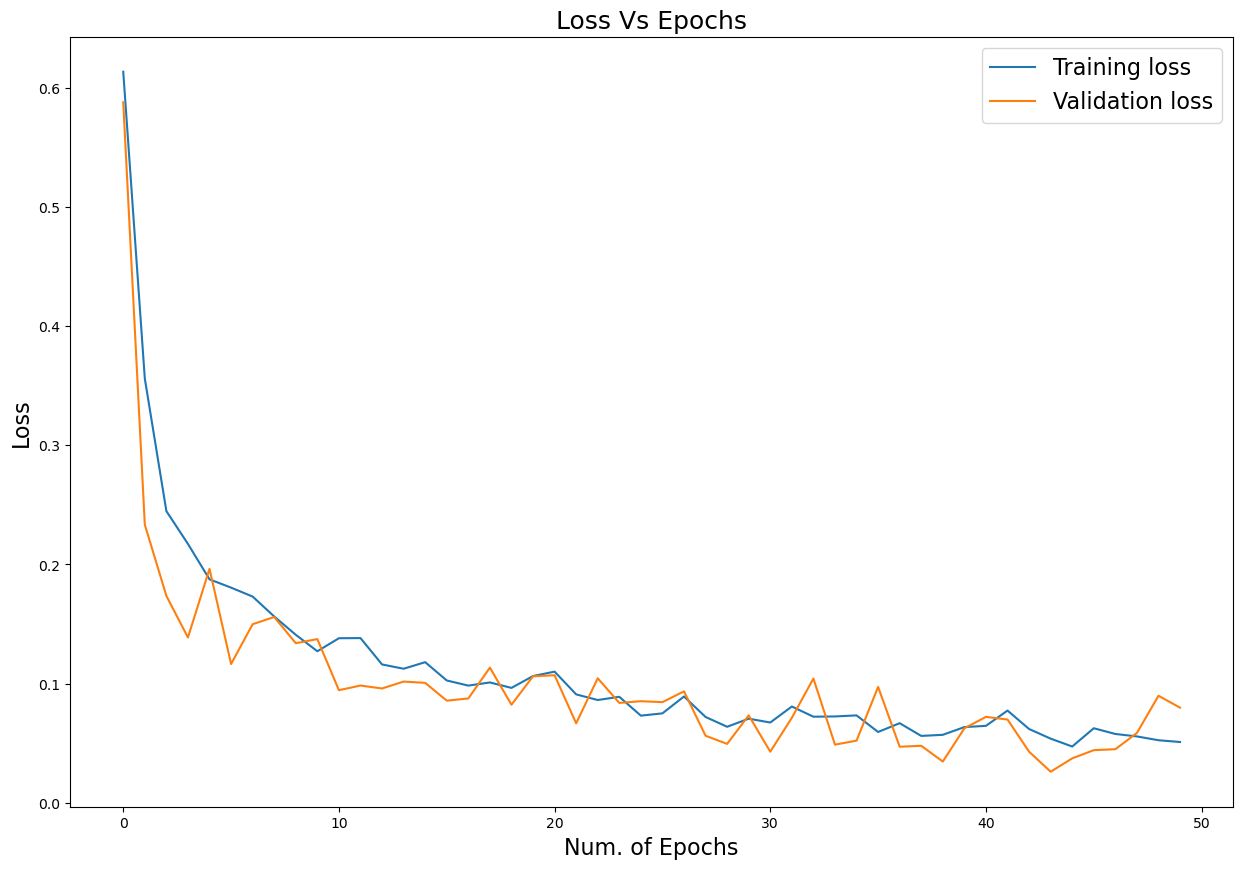

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Training loss','Validation loss'], fontsize=16)
plt.title("Loss Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
print("Loss Vs Num. of Epochs")
print("Training Loss : 0.0519","\nValue loss : 0.0701")
plt.show()
     


In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
     

## PLOTING ACCURACY V/S NUMBER OF EPCOHS

Accuracy Vs Epochs
Training accuracy : 0.9816 
Value accuracy : 1.0000


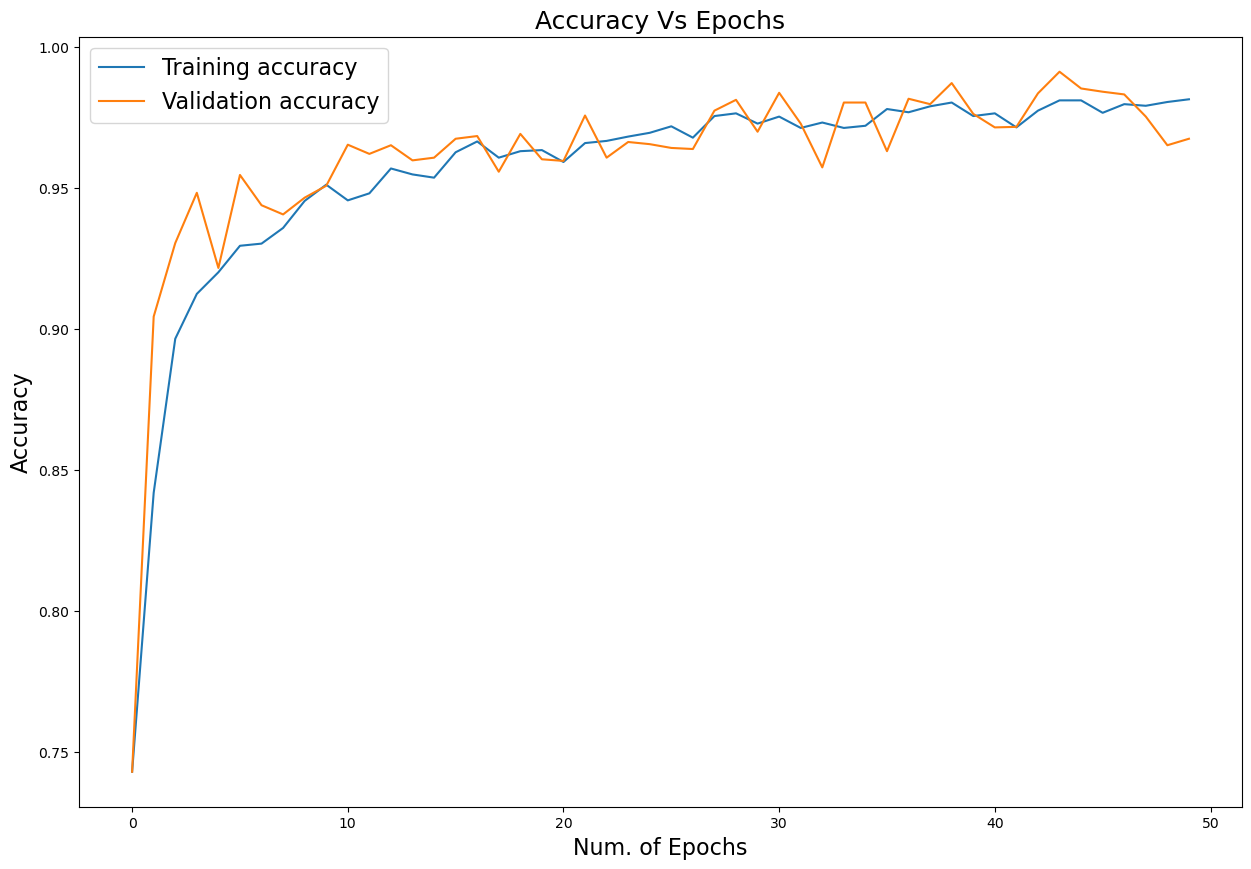

In [14]:
plt.figure(figsize=(15, 10))
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['Training accuracy','Validation accuracy'], fontsize=16)
plt.title("Accuracy Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
print("Accuracy Vs Epochs")
print("Training accuracy : 0.9816","\nValue accuracy : 1.0000")
plt.show()
     

In [15]:
cccc


In [16]:
import warnings
warnings.filterwarnings("ignore", message="Skipping variable loading for optimizer")


In [17]:
from keras.models import load_model
model = load_model("my_model.keras")
     

In [18]:
eval_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = eval_datagen.flow_from_directory(
     r"C:\Users\pnuka\Desktop\LUNGS DEMO\chest_xray\test",
    target_size = (300, 300),
    batch_size = 128, 
    class_mode = 'binary'
)

eval_result = model.evaluate(test_generator, steps=624)

print('loss :', eval_result[0])
print('accuracy :', eval_result[1])
     

Found 624 images belonging to 2 classes.


C:\Users\pnuka\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9247 - loss: 0.2143 
loss : 0.21443070471286774
accuracy : 0.9246794581413269


C:\Users\pnuka\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [ ]:
img= cv2.imread()
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
model.predict(img)
     

In [ ]:
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
plt.imshow(tempimg)
print("Prediction: "+prediction)
plt.title("Prediction: "+prediction, fontsize=14)
     

In [ ]:
img= cv2.imread('/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person104_bacteria_492.jpeg')
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
model.predict(img)
     

In [19]:
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)
     

NameError: name 'img' is not defined